In [6]:
import numpy as np
import matplotlib.pyplot as plt
from draine_dust_2D import draine_dust
import astropy.units as u

In [7]:
dust = draine_dust(type="SMC")

TypeError: draine_dust.__init__() got multiple values for argument 'type'

In [ ]:
lambdas = np.arange(1000., 8000., 500.) * u.AA
thetas = np.arange(0., 180., 1.)*u.deg
cos_ths = np.cos(thetas)



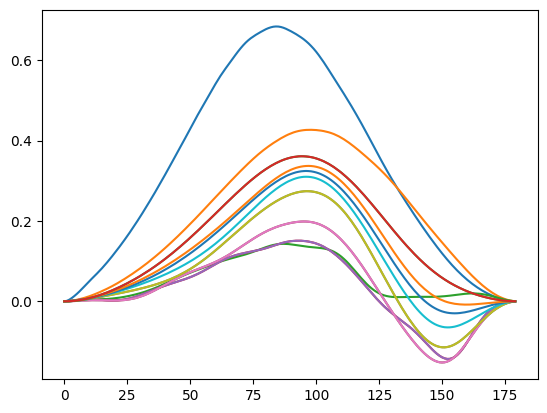

In [5]:
lambdas = np.arange(1000., 8000., 500.) * u.AA
thetas = np.arange(0., 180., 1.)*u.deg
cos_ths = np.cos(thetas)

for lam in lambdas:
    dust = draine_dust(lam, type="SMC")
    plt.plot(thetas, dust.pfrac(cos_ths))

plt.show()